This code is an attempt to simulate the CMB (again) for further analysis using machine learning.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import healpy
import numpy

Healpy documentation:
https://healpy.readthedocs.io/en/latest/generated/healpy.sphtfunc.synfast.html

Healpy tutorial:
https://github.com/healpy/healpy/blob/master/doc/healpy_tutorial.ipynb

In [3]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, healpy.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


In [4]:
NPIX = healpy.nside2npix(NSIDE)
print(NPIX)

12288


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


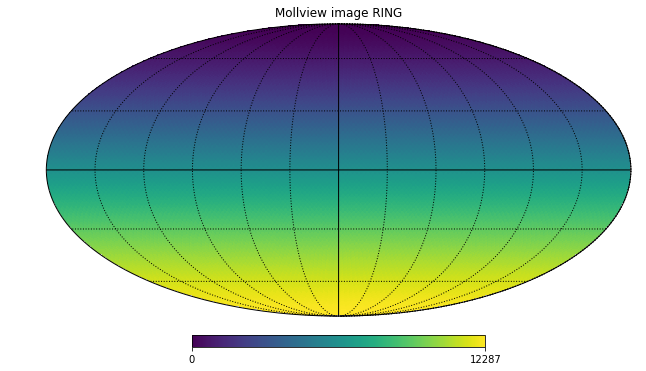

In [5]:
m = numpy.arange(NPIX)
healpy.mollview(m, title="Mollview image RING")
healpy.graticule()

In [7]:
vec = healpy.ang2vec(numpy.pi / 2, numpy.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [8]:
ipix_disc = healpy.query_disc(nside=32, vec=vec, radius=numpy.radians(10))

In [9]:
theta, phi = numpy.degrees(healpy.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


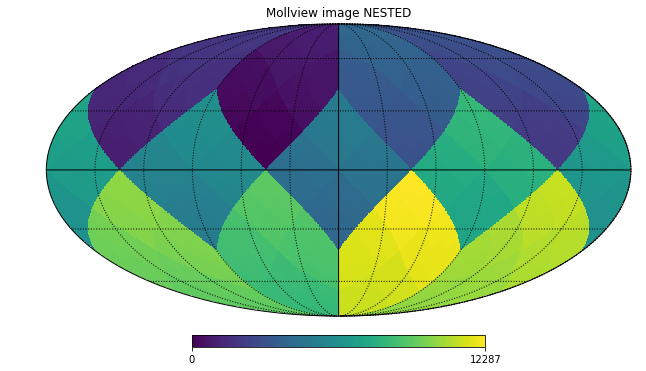

In [10]:
m = numpy.arange(NPIX)
healpy.mollview(m, nest=True, title="Mollview image NESTED")
healpy.graticule()

In [11]:
vec = healpy.ang2vec(numpy.pi / 2, numpy.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [12]:
ipix_disc = healpy.query_disc(nside=32, vec=vec, radius=numpy.radians(10))

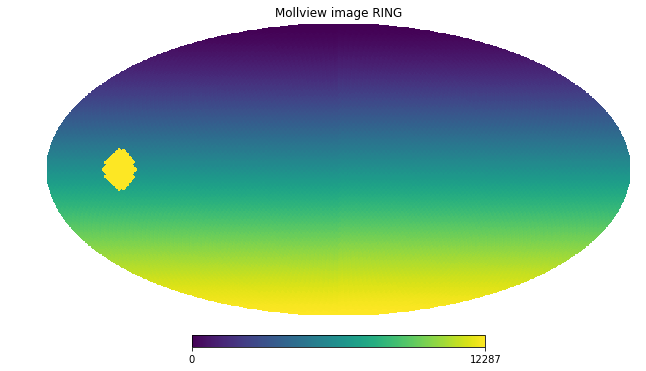

In [13]:
m = numpy.arange(NPIX)
m[ipix_disc] = m.max()
healpy.mollview(m, title="Mollview image RING")

In [14]:
theta, phi = numpy.degrees(healpy.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))

In [4]:
cls = numpy.loadtxt("planck_2018_cl/base_plikHM_TTTEEE_lowl_lowE_lensing_scalCls.dat")

In [16]:
map1 = healpy.sphtfunc.synfast(cls[:,4], NSIDE)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/samanthausman/anaconda2/lib/python2.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


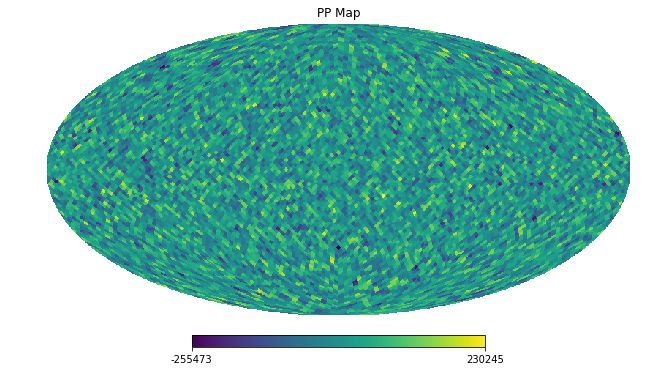

In [17]:
guessandcheck = healpy.mollview(map1, title="PP Map")

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


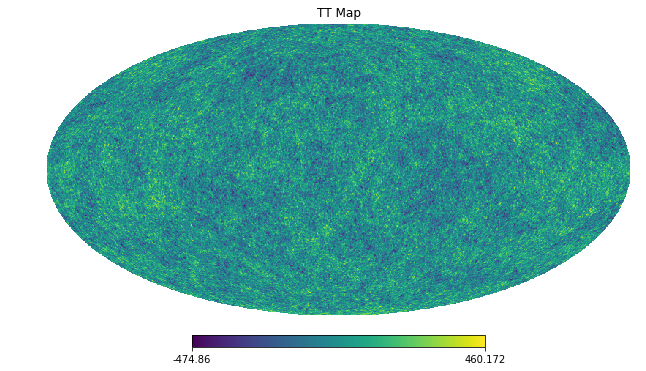

In [18]:
map2 = healpy.sphtfunc.synfast(cls[:,1]/((cls[:,0]*(cls[:,0]+1)/(2*numpy.pi))), 512)
guessandcheck = healpy.mollview(map2, title="TT Map")

In [19]:
state = numpy.random.get_state()
numpy.random.set_state(state)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


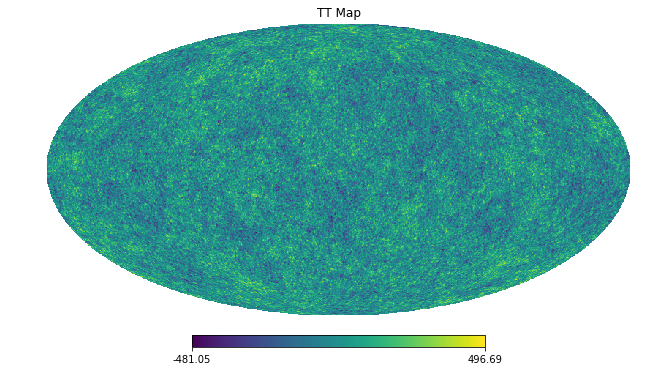

In [20]:
numpy.random.seed(5)
mapA = healpy.sphtfunc.synfast(cls[:,1]/((cls[:,0]*(cls[:,0]+1)/(2*numpy.pi))), 512)
guessandcheck = healpy.mollview(mapA, title="TT Map")

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


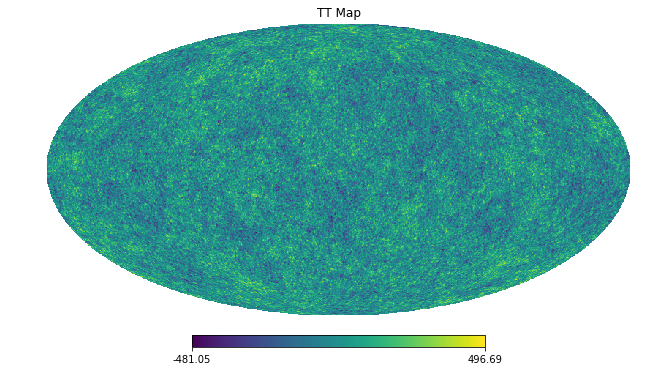

In [21]:
numpy.random.seed(5)
mapB = healpy.sphtfunc.synfast(cls[:,1]/((cls[:,0]*(cls[:,0]+1)/(2*numpy.pi))), 512)
guessandcheck = healpy.mollview(mapB, title="TT Map")

In [27]:
almB = healpy.sphtfunc.map2alm(mapB, lmax=cls[-1,0])
clB = healpy.sphtfunc.alm2cl(almB,  lmax=int(cls[-1,0]))